# The Network

For this one, we'll use the networkx package to visualize network data.

https://networkx.github.io/

In this notebook, we'll do some simple things with graphs!

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# You will need to install 'networkx'
import networkx as nx

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans 

from sklearn.datasets import make_swiss_roll
from sklearn.datasets import make_s_curve
from sklearn.datasets import make_circles

In [5]:
# small demo of networkx; plotting graphs with it
G = nx.Graph()

G.add_node('The Shire')
G.add_node('Mordor')
G.add_node('That place with\n the elves')

G.add_edge('The Shire', 'That place with\n the elves')
G.add_edge('That place with\n the elves', 'Mordor')

In [6]:
# Getting an adjacency matrix from the graph object

print "Node set: ", G.nodes()
print nx.adjacency_matrix(G).toarray()

Node set:  ['That place with\n the elves', 'The Shire', 'Mordor']
[[0 1 1]
 [1 0 0]
 [1 0 0]]


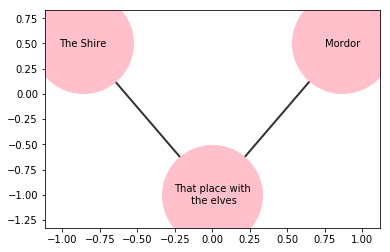

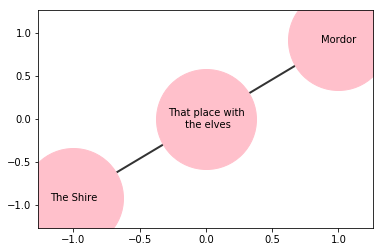

In [21]:
# plotting a graph

def nice_graph_plot(G, node_size=500, edge_width=2, font_size=10, layout="spectral"):
    if layout == "spectral":
        node_position = nx.spectral_layout(G)
    elif layout == "spring":
        node_position = nx.spring_layout(G)
    else:
        print "No valid layout provided"
    
    nx.draw_networkx_nodes(G, node_position, 
                           node_size=node_size, alpha=1, node_color='pink')
    nx.draw_networkx_edges(G, node_position, 
                           width=edge_width, alpha=.8, edge_color='black')
    nx.draw_networkx_labels(G, node_position, 
                            font_size=font_size, font_family='sans-serif')
    
    plt.show()
    
nice_graph_plot(G, 10000)
nice_graph_plot(G, 10000, layout="spring")

# Graphs from an adjacency matrix

Write a function that makes a networkx graph object from an adjacency matrix.

Assume that the adjacency matrix is for an undirected graph; that is, the matrix is symmetric.

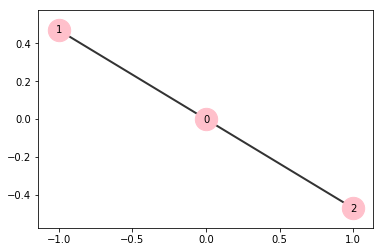

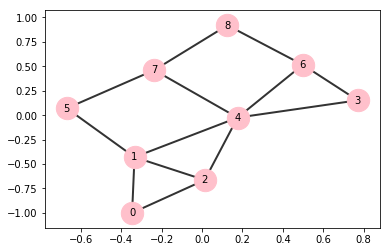

In [18]:
# a simple test adjacency matrix
A = np.array([[0, 1, 1], 
              [1, 0, 0],
              [1, 0, 0]])

# a not as simple adjacency matrix
B = np.array([[0, 1, 1, 0, 0, 0, 0, 0, 0],
              [1, 0, 1, 0, 1, 1, 0, 0, 0],
              [1, 1, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 1, 0, 0],
              [0, 1, 1, 1, 0, 0, 1, 1, 0],
              [0, 1, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 1, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 1, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 1, 1, 0]])

def adj_to_graph(A):
    n_nodes = A.shape[0]
    
    G = nx.Graph()
    
    for i in range(n_nodes):
        G.add_node(str(i))
    
    for i in range(n_nodes):
        for j in range(i, n_nodes):
            if A[i, j] == 1:
                G.add_edge(str(i), str(j))
                
    return G

A = np.array([[0, 1, 1], 
              [1, 0, 0],
              [1, 0, 0]])

GA = adj_to_graph(A)
nice_graph_plot(GA)

GB = adj_to_graph(B)
nice_graph_plot(GB)

# Degree from an adjecency matrix

Assume again you have an undirected graph's adjacency matrix.

Write a function to compute the degree of each node from a matrix.

Use the make_degree_dist_histogram to plot the degree distribution

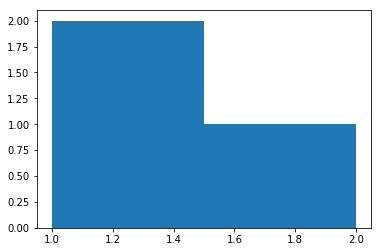

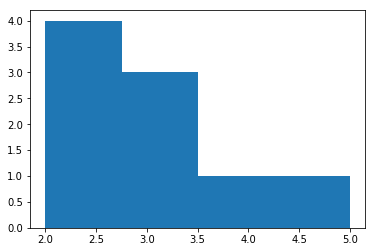

In [20]:
def make_degree_dist_histogram(degrees):
    '''
    degrees is assumed to be numpy array of degrees of nodes'''
    plt.hist(degrees, np.ptp(degrees) + 1)
    plt.show()

def get_degree(A):
    return A.sum(1)

make_degree_dist_histogram(get_degree(A))

make_degree_dist_histogram(get_degree(B))

# Random graphs

networkx has a few random graph generators, lets try them out!

Look at the random graphs here:
https://networkx.github.io/documentation/latest/reference/generators.html

Some interesting ones:

1. barbell_graph is a cute fixed one
2. erdos-renyi graphs https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model Here, we draw edges at random between edges, giving a certain degree distribution. Does this graph look like anything real?
3. watts_strogatz_graph https://en.wikipedia.org/wiki/Watts_and_Strogatz_model This graph makes 'small world' graphs.
4. barabasi_albert_graph https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model This makes graphs with power law distributions, which is something we observe a lot in real social networks (e.g. consider the graph of Twitter users)

BARBELL


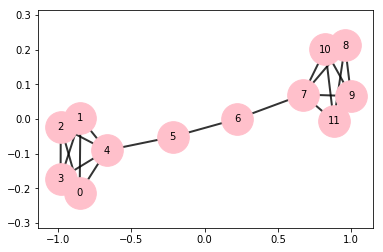

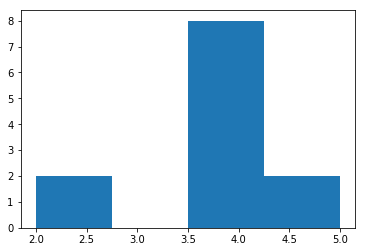

ERDOS-RENYI


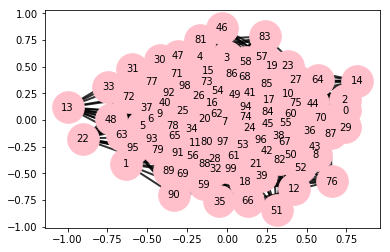

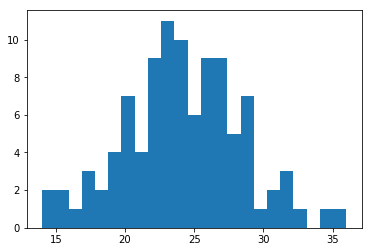

LOBSTER


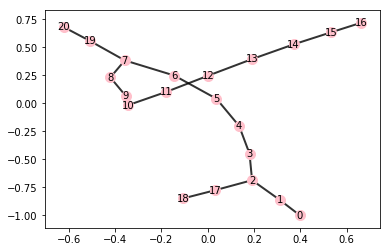

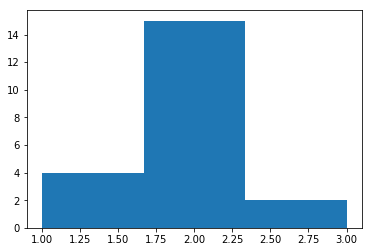

WATTS-STROGATZ


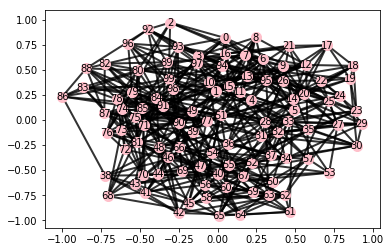

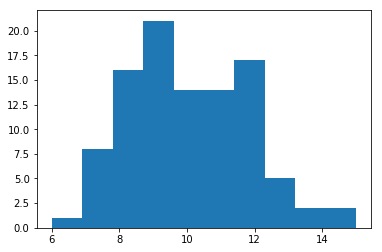

BARABASI-ALBERT


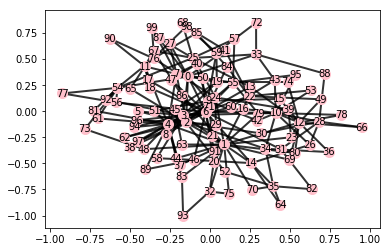

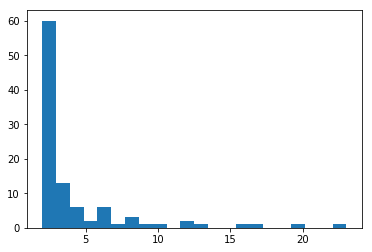

In [10]:
print "BARBELL"
GBB = nx.barbell_graph(5, 2)
nice_graph_plot(GBB, layout="spring")
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GBB).toarray()))

print "ERDOS-RENYI"
GER = nx.fast_gnp_random_graph(100, 0.25)
nice_graph_plot(GER, layout="spring")
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GER).toarray()))

print "LOBSTER"
GLOB = nx.random_lobster(10, 0.25, 0.75)
nice_graph_plot(GLOB, layout="spring", node_size=100)
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GLOB).toarray()))

print "WATTS-STROGATZ"
GWS = nx.watts_strogatz_graph(100, 10, .4)
nice_graph_plot(GWS, layout="spring", node_size=100)
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GWS).toarray()))

print "BARABASI-ALBERT"
GBA = nx.barabasi_albert_graph(100, 2)
nice_graph_plot(GBA, layout="spring", node_size=100)
make_degree_dist_histogram(get_degree(nx.adjacency_matrix(GBA).toarray()))


# Closeness

Implement a measure of closeness. For example: the average length of paths to all other nodes in the network.

Hint: the adjacency matrix for two steps is given by the adjacency matrix squared, e.g.:

np.dot(A, A)

This generalizes to any number of steps.

Plot closeness distributions for some random graphs.

BARBELL


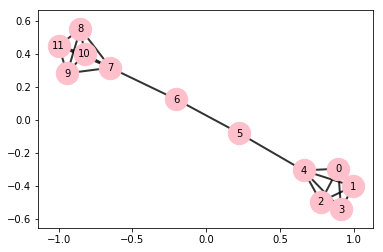

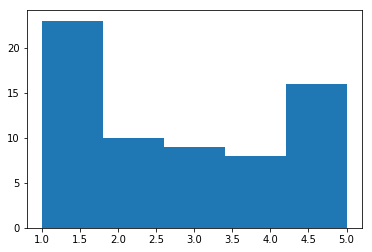

ERDOS-RENYI


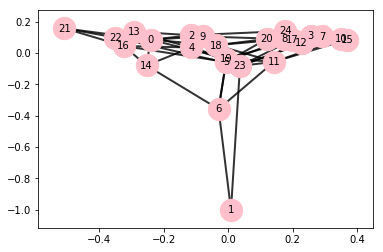

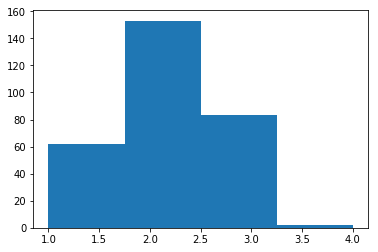

LOBSTER


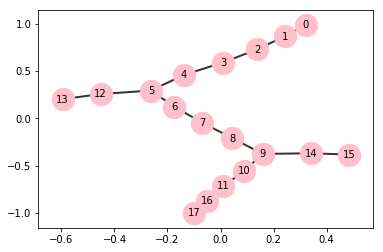

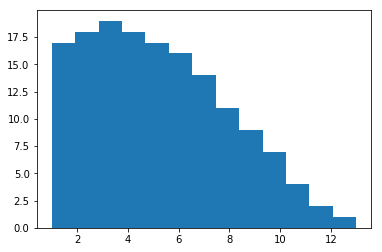

WATTS-STORGATZ


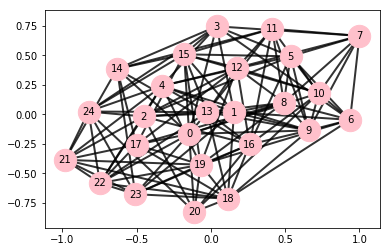

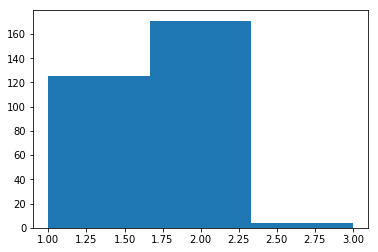

BARABASI-ALBERT


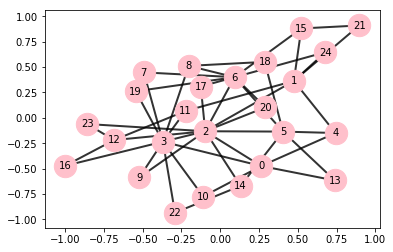

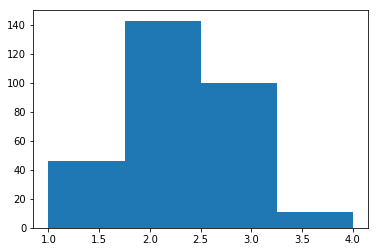

In [23]:
def distance_to_other_node(A, i, j):
    steps = 1
    if A[i, j] > 0:
        return steps
    
    B = A
    for s in range(A.shape[0]):
        steps += 1
        B = np.dot(B, A)
        if B[i, j] > 0:
            return steps
    
    # indicates there is no path from i to j
    return 0

def closeness(A):
    close_mat = []
    for ii in range(A.shape[0]):
        for jj in range(ii+1, A.shape[0]):
            close_mat.append(distance_to_other_node(A, ii, jj))
    return np.array(close_mat)

print "BARBELL"
GBB = nx.barbell_graph(5, 2)
nice_graph_plot(GBB, layout="spring")
make_degree_dist_histogram(closeness(nx.adjacency_matrix(GBB).toarray()))

print "ERDOS-RENYI"
GER = nx.fast_gnp_random_graph(25, 0.25)
nice_graph_plot(GER, layout="spectral")
make_degree_dist_histogram(closeness(nx.adjacency_matrix(GER).toarray()))

print "LOBSTER"
GLOB = nx.random_lobster(25, 0.25, 0.75)
nice_graph_plot(GLOB, layout="spring")
make_degree_dist_histogram(closeness(nx.adjacency_matrix(GLOB).toarray()))

print "WATTS-STORGATZ"
GWS = nx.watts_strogatz_graph(25, 10, .4)
nice_graph_plot(GWS, layout="spring")
make_degree_dist_histogram(closeness(nx.adjacency_matrix(GWS).toarray()))

print "BARABASI-ALBERT"
GBA = nx.barabasi_albert_graph(25, 2)
nice_graph_plot(GBA, layout="spring")
make_degree_dist_histogram(closeness(nx.adjacency_matrix(GBA).toarray()))
